In [11]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans, OPTICS


In [2]:
# Setup data

data_folder = './data'
recipes_file = 'cleaned_data.parquet'

cars_data = pd.read_parquet(os.path.join(data_folder, recipes_file))

cars_prices = cars_data['price']
cars_data.drop(columns='price', inplace=True)

X_train, X_test, y_train, y_test = train_test_split(cars_data, cars_prices, 
                                                    test_size=0.10, random_state=37)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                    test_size=0.10/0.90, random_state=42)

scaler = StandardScaler().fit(X_train)
X_train_transformed = pd.DataFrame(scaler.transform(X_train), columns= X_train.columns)
X_test_transformed  = pd.DataFrame(scaler.transform(X_test), columns= X_test.columns)
X_val_transformed  = pd.DataFrame(scaler.transform(X_val) ,columns= X_val.columns)

In [3]:
kmeans_cluster = KMeans(n_clusters=2, random_state=1, n_init='auto').fit(X_train_transformed)


<Axes: xlabel='odometer', ylabel='year'>

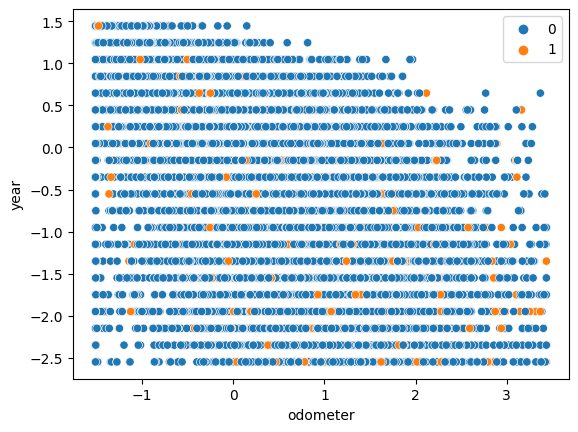

In [4]:
valDataFrame = pd.DataFrame(X_val_transformed.copy())
valDataFrame.columns = X_val.columns
sns.scatterplot(valDataFrame, x = 'odometer', y = 'year', 
                hue = kmeans_cluster.predict(valDataFrame))

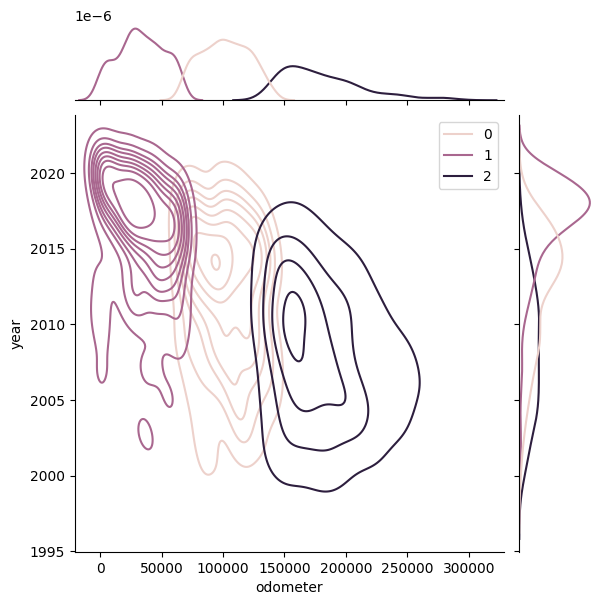

In [10]:
kmeans_cluster = KMeans(n_clusters=3, random_state=1, n_init='auto').fit(X_train[['odometer', 'year']])
valDataFrame = pd.DataFrame(X_val[['odometer', 'year']].copy())
valDataFrame.columns = ['odometer', 'year']
valdfPredict = kmeans_cluster.predict(valDataFrame.iloc[:1000])
# sns.kdeplot(valDataFrame, x = 'odometer', y = 'year', 
#                 hue = kmeans_cluster.predict(valDataFrame))
sns.jointplot(valDataFrame.iloc[:1000], x = 'odometer', y = 'year', 
                hue = valdfPredict, kind = 'kde')

In [23]:
kmeans_cluster = OPTICS(min_samples=0.1, max_eps=10000).fit(X_train[['odometer', 'year']].iloc[:1000])

In [24]:
kmeans_cluster = OPTICS(min_samples=0.1, max_eps=10000).fit(X_train[['odometer', 'year']].iloc[:10000])

In [ ]:
kmeans_cluster = OPTICS(min_samples=0.1, max_eps=10000).fit(X_train[['odometer', 'year']].iloc[:100000])

[-1  0  0  0  0 -1 -1 -1  0  0  0  0  0  0 -1 -1  0  0 -1  0  0  0 -1 -1
  0 -1 -1 -1  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0
  0  0  0  0  0 -1  0 -1  0  0  0  0 -1  0  0 -1  0 -1  0  0  0  0  0  0
  0 -1  0  0  0  0 -1  0  0  0  0 -1  0  0  0 -1 -1 -1  0 -1  0  0  0  0
 -1  0  0 -1  0 -1  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0 -1  0  0  0
  0 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0
  0  0 -1  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1  0 -1  0  0 -1  0  0 -1
  0  0  0  0  0 -1  0  0 -1  0  0  0  0  0 -1  0 -1  0  0  0  0  0 -1 -1
  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0 -1  0  0 -1 -1 -1  0  0  0
  0  0  0  0  0  0 -1 -1  0 -1  0 -1 -1  0  0  0 -1  0 -1 -1  0 -1  0  0
  0  0  0  0 -1  0  0  0 -1  0  0 -1  0  0  0  0 -1 -1  0  0 -1  0  0  0
 -1 -1 -1  0 -1  0 -1 -1 -1  0 -1  0  0  0  0  0 -1  0  0  0 -1  0  0  0
  0 -1  0  0  0 -1 -1  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0  0
 -1  0  0  0  0 -1  0  0  0  0 -1 -1  0  0  0 -1  0

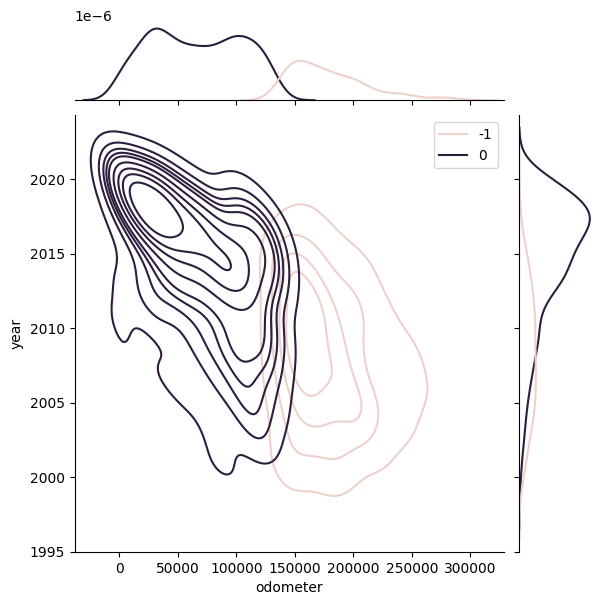

In [ ]:
valDataFrame = pd.DataFrame(X_val[['odometer', 'year']].copy())
valDataFrame.columns = ['odometer', 'year']
valdfPredict = kmeans_cluster.fit_predict(valDataFrame.iloc[:10000])
print(valdfPredict)
# sns.kdeplot(valDataFrame, x = 'odometer', y = 'year', 
#                 hue = kmeans_cluster.predict(valDataFrame))
sns.jointplot(valDataFrame.iloc[:10000], x = 'odometer', y = 'year', 
                hue = valdfPredict, kind = 'kde')